<img src='C:/Users/Hamid/Desktop/Atelier_formation_LMDZ_2/logo' alt='Logo um6p' align='right' width='50%'> </img>

# Analysis of the African moussoun using LMDZ similation

## 1. Import python models

In [124]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import os 
from pathlib import Path
import numpy as np
import pandas as pd
import netCDF4 as nc
from netCDF4 import Dataset
import datetime as dt
import calendar as cld
import matplotlib.pyplot as plt
import xarray as xr
from os import listdir
from os.path import isfile, join
import cartopy.crs as ccrs
import cartopy 
import proplot as plot  # New plot library (https://proplot.readthedocs.io/en/latest/)
from scipy import stats
import sys
import pymannkendall as mk
import calendar
import time
import matplotlib.image as mpimg
import plotly.express as px   
import datetime  
import seaborn as sns
import pyhomogeneity as hg
from cartopy.feature import NaturalEarthFeature

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2. Importing and data wrangling of ESA CCI scfg daily product gap-filled and not gap-filled in the four virtual stations

In [2]:
# Path to data
path = r'C:\Users\Hamid\Desktop\Atelier_formation_LMDZ_2\data'

mons = xr.open_mfdataset(path +r'\2001_histmth.nc')
print(mons) 
print("==================================================================================")
mons    

<xarray.Dataset>
Dimensions:            (time_counter: 12, bnds: 2, lon: 48, lat: 37, presnivs: 39)
Coordinates:
  * time_counter       (time_counter) object 2000-01-16 00:00:00 ... 2000-12-...
  * lon                (lon) float32 -166.2 -151.1 -136.0 ... 148.5 163.5 178.6
  * lat                (lat) float32 90.0 80.55 71.18 ... -71.1 -80.55 -90.0
  * presnivs           (presnivs) float32 1.009e+05 9.993e+04 ... 15.91 4.307
Dimensions without coordinates: bnds
Data variables: (12/561)
    time_counter_bnds  (time_counter, bnds) object dask.array<chunksize=(12, 2), meta=np.ndarray>
    phis               (time_counter, lat, lon) float32 dask.array<chunksize=(12, 37, 48), meta=np.ndarray>
    aire               (lat, lon) float32 dask.array<chunksize=(37, 48), meta=np.ndarray>
    contfracATM        (lat, lon) float32 dask.array<chunksize=(37, 48), meta=np.ndarray>
    contfracOR         (time_counter, lat, lon) float32 dask.array<chunksize=(12, 37, 48), meta=np.ndarray>
    sza        

<xarray.Dataset>
Dimensions:            (time_counter: 12, bnds: 2, lon: 48, lat: 37, presnivs: 39)
Coordinates:
  * time_counter       (time_counter) object 2000-01-16 00:00:00 ... 2000-12-...
  * lon                (lon) float32 -166.2 -151.1 -136.0 ... 148.5 163.5 178.6
  * lat                (lat) float32 90.0 80.55 71.18 ... -71.1 -80.55 -90.0
  * presnivs           (presnivs) float32 1.009e+05 9.993e+04 ... 15.91 4.307
Dimensions without coordinates: bnds
Data variables: (12/561)
    time_counter_bnds  (time_counter, bnds) object dask.array<chunksize=(12, 2), meta=np.ndarray>
    phis               (time_counter, lat, lon) float32 dask.array<chunksize=(12, 37, 48), meta=np.ndarray>
    aire               (lat, lon) float32 dask.array<chunksize=(37, 48), meta=np.ndarray>
    contfracATM        (lat, lon) float32 dask.array<chunksize=(37, 48), meta=np.ndarray>
    contfracOR         (time_counter, lat, lon) float32 dask.array<chunksize=(12, 37, 48), meta=np.ndarray>
    sza                (time_counter, lat, lon) float32 dask.array<chunksize=(12, 37, 48), meta=np.ndarray>
    ...                 ...
    dPB_trsp           (time_counter, presnivs, lat, lon) float32 dask.array<chunksize=(12, 39, 37, 48), meta=np.ndarray>
    dPB_sscav          (time_counter, presnivs, lat, lon) float32 dask.array<chunksize=(12, 39, 37, 48), meta=np.ndarray>
    dPB_sat            (time_counter, presnivs, lat, lon) float32 dask.array<chunksize=(12, 39, 37, 48), meta=np.ndarray>
    dPB_uscav          (time_counter, presnivs, lat, lon) float32 dask.array<chunksize=(12, 39, 37, 48), meta=np.ndarray>
    cumdPB_dry         (time_counter, lat, lon) float32 dask.array<chunksize=(12, 37, 48), meta=np.ndarray>
    cumPB              (time_counter, lat, lon) float32 dask.array<chunksize=(12, 37, 48), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.1
    history:      Wed Nov 09 10:17:44 2022: cdo mergetime histmth.200101.nc h...
    file_name:    histmth.nc
    production:   An IPSL model
    TimeStamp:    2022-NOV-09 01:24:51 GMT+0000
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

# 1. Precipitations analysis 

In [3]:
precip = mons['precip']

In [26]:
t2m = mons['t2m']

In [40]:
rh2m = mons['rh2m']

In [113]:
v500 = mons['v500']*10

In [114]:
v10 = mons['v10']*10

In [57]:
precip_afr = precip.sel(lat=slice(40, -20), lon=slice(0,20))

In [58]:
t2m_afr = t2m.sel(lat=slice(40, -20), lon=slice(0,20))

In [59]:
rh2m_afr = rh2m.sel(lat=slice(40, -20), lon=slice(0,20))

In [115]:
v500 = v500.sel(lat=slice(40, -20), lon=slice(0,20))

In [116]:
v10 = v10.sel(lat=slice(40, -20), lon=slice(0,20))

In [60]:
precip_afr = precip_afr * 86400

In [61]:
# This auxiliary function will help us in the formatting of the figures
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

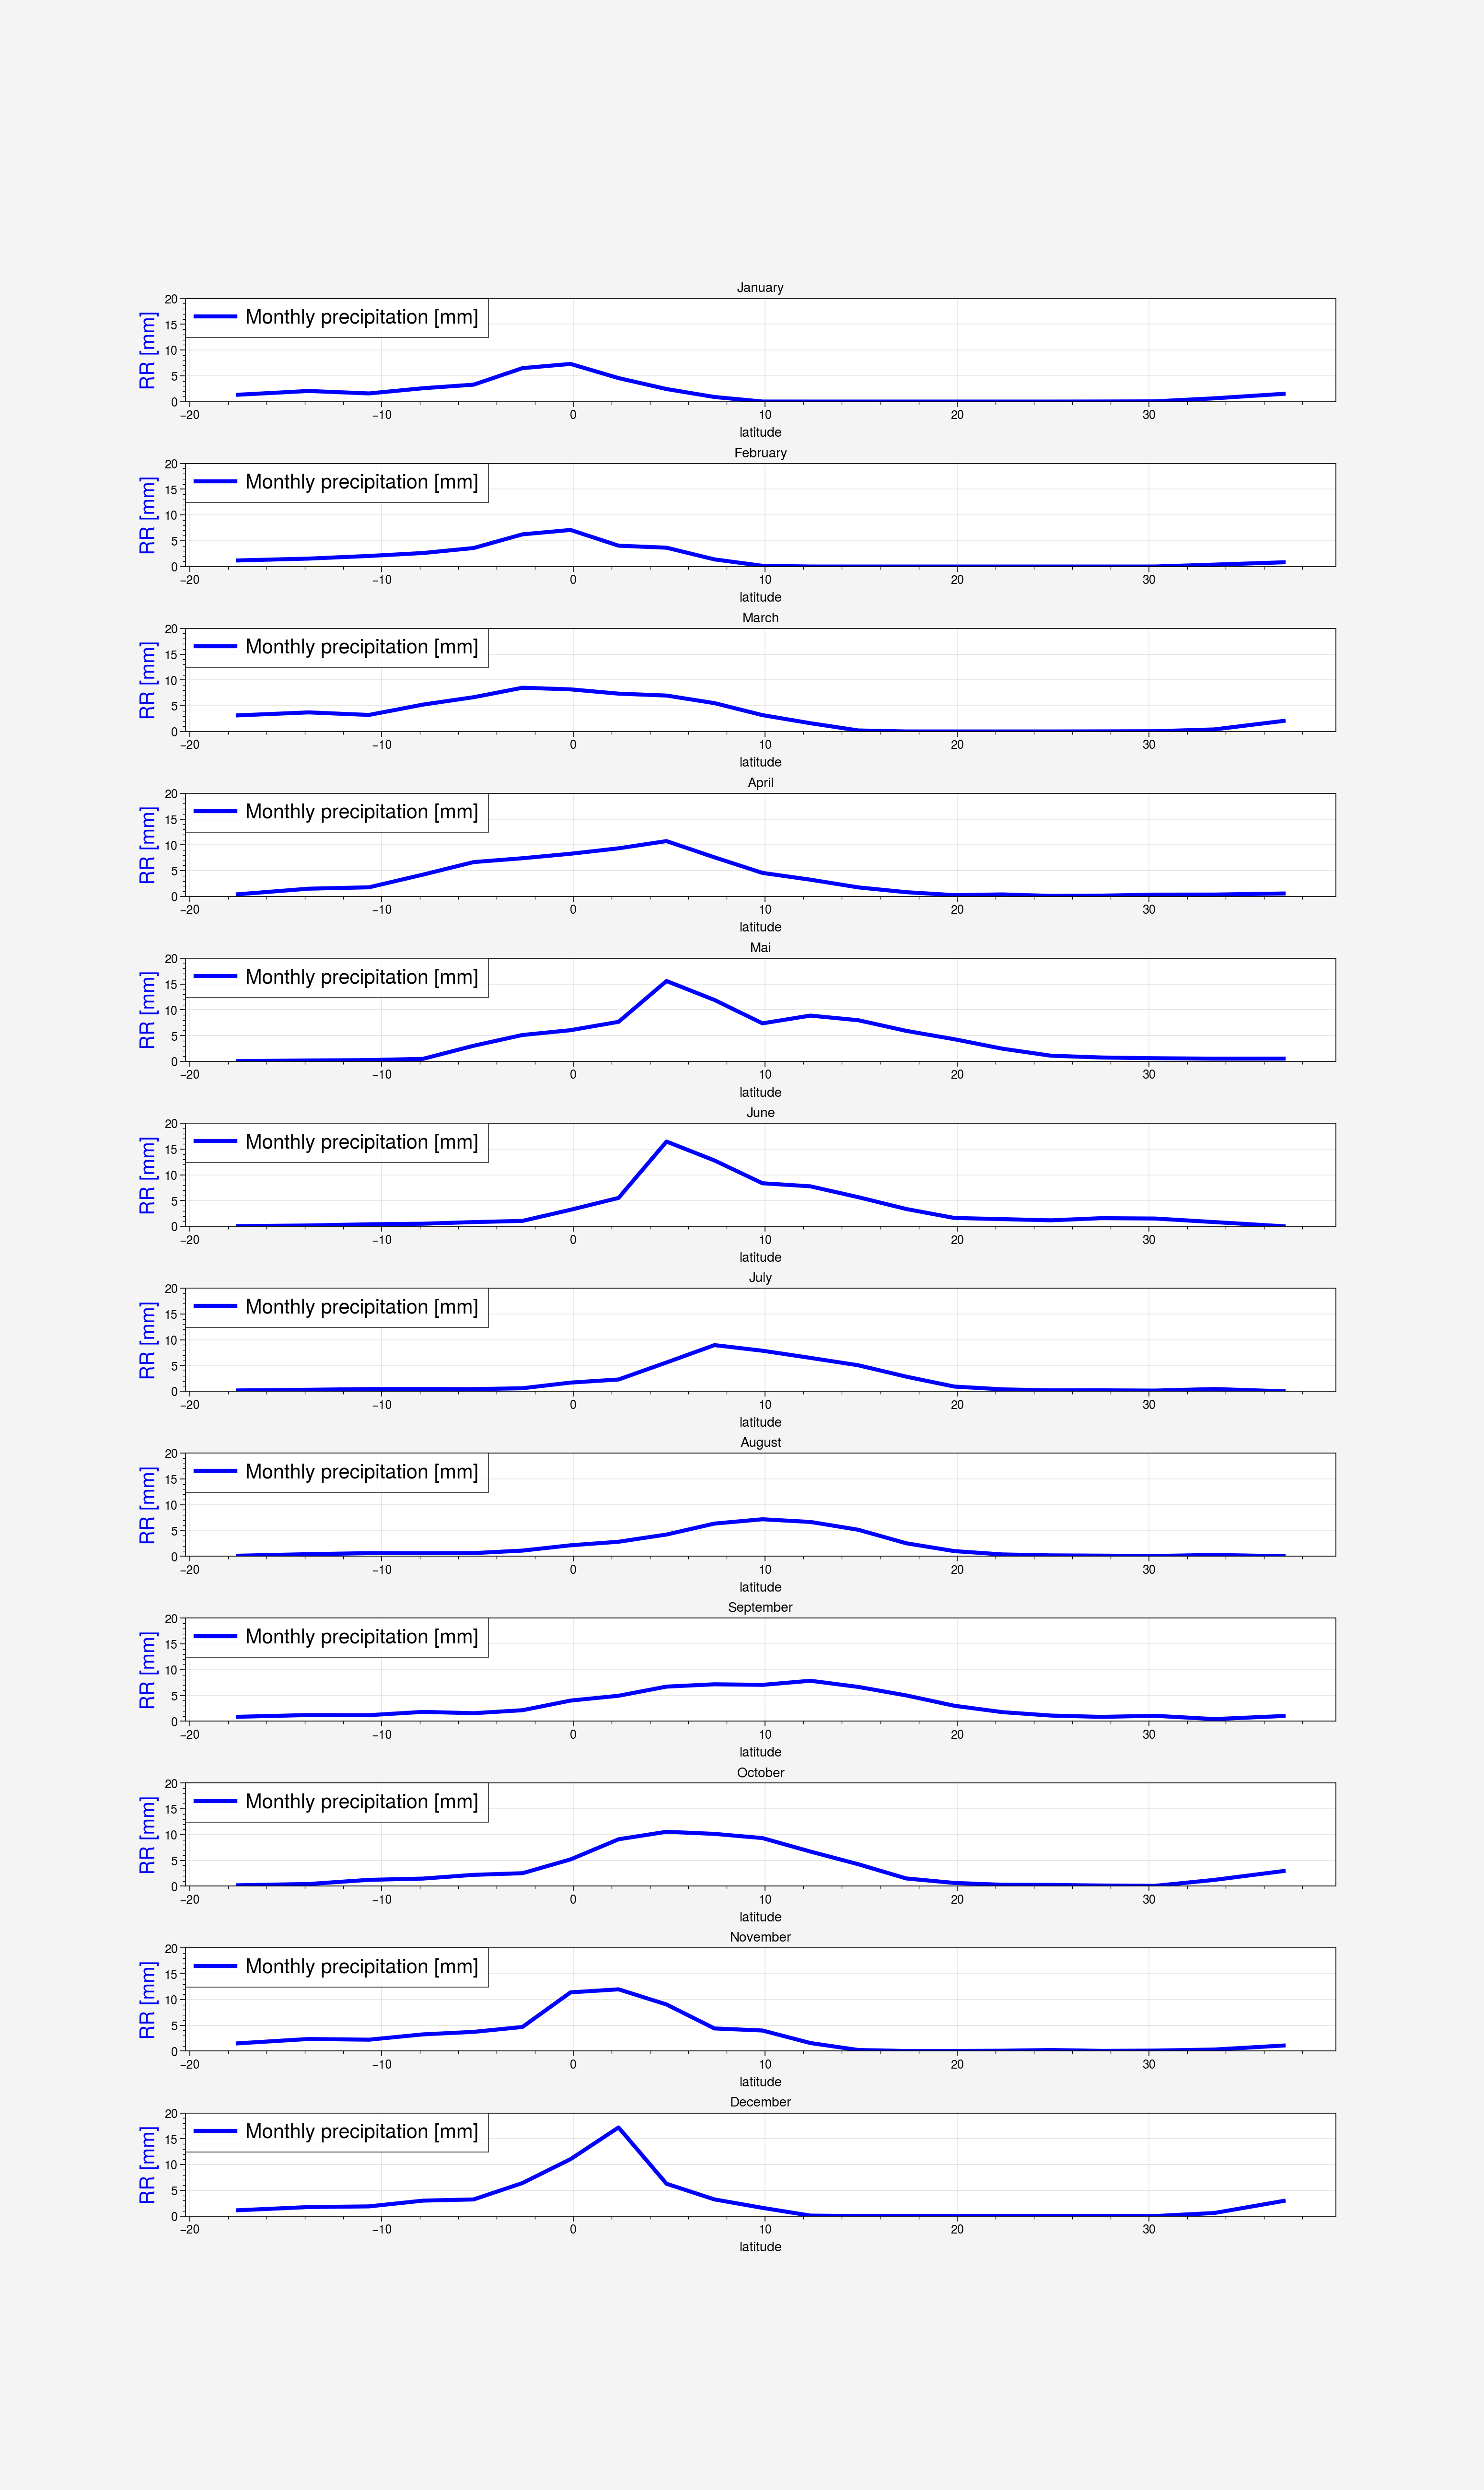

In [63]:
Noms=["January","February","March","April","Mai","June","July","August","September","October","November","December"]
fig, axs=plt.subplots(12, 1) 
# We fix the spaces between the subfigures
plt.subplots_adjust(wspace=0.5,hspace=0.6)

# We fix the size of figure
set_size(12,20)
color = 'blue'

for i in range(12):
    precip_afr.mean(dim='lon')[i,:].plot.line(ax=axs[i], color=color, linewidth=3)
    axs[i].set_title(Noms[i],fontsize=10)
    axs[i].set_xlabel("latitude", fontsize=10) 
    axs[i].legend(labels = ["Monthly precipitation [mm]"],  loc='upper left', fontsize=15)
    axs[i].set_ylabel("RR [mm]", color=color, fontsize=15) 
    axs[i].set_ylim(0,20) 

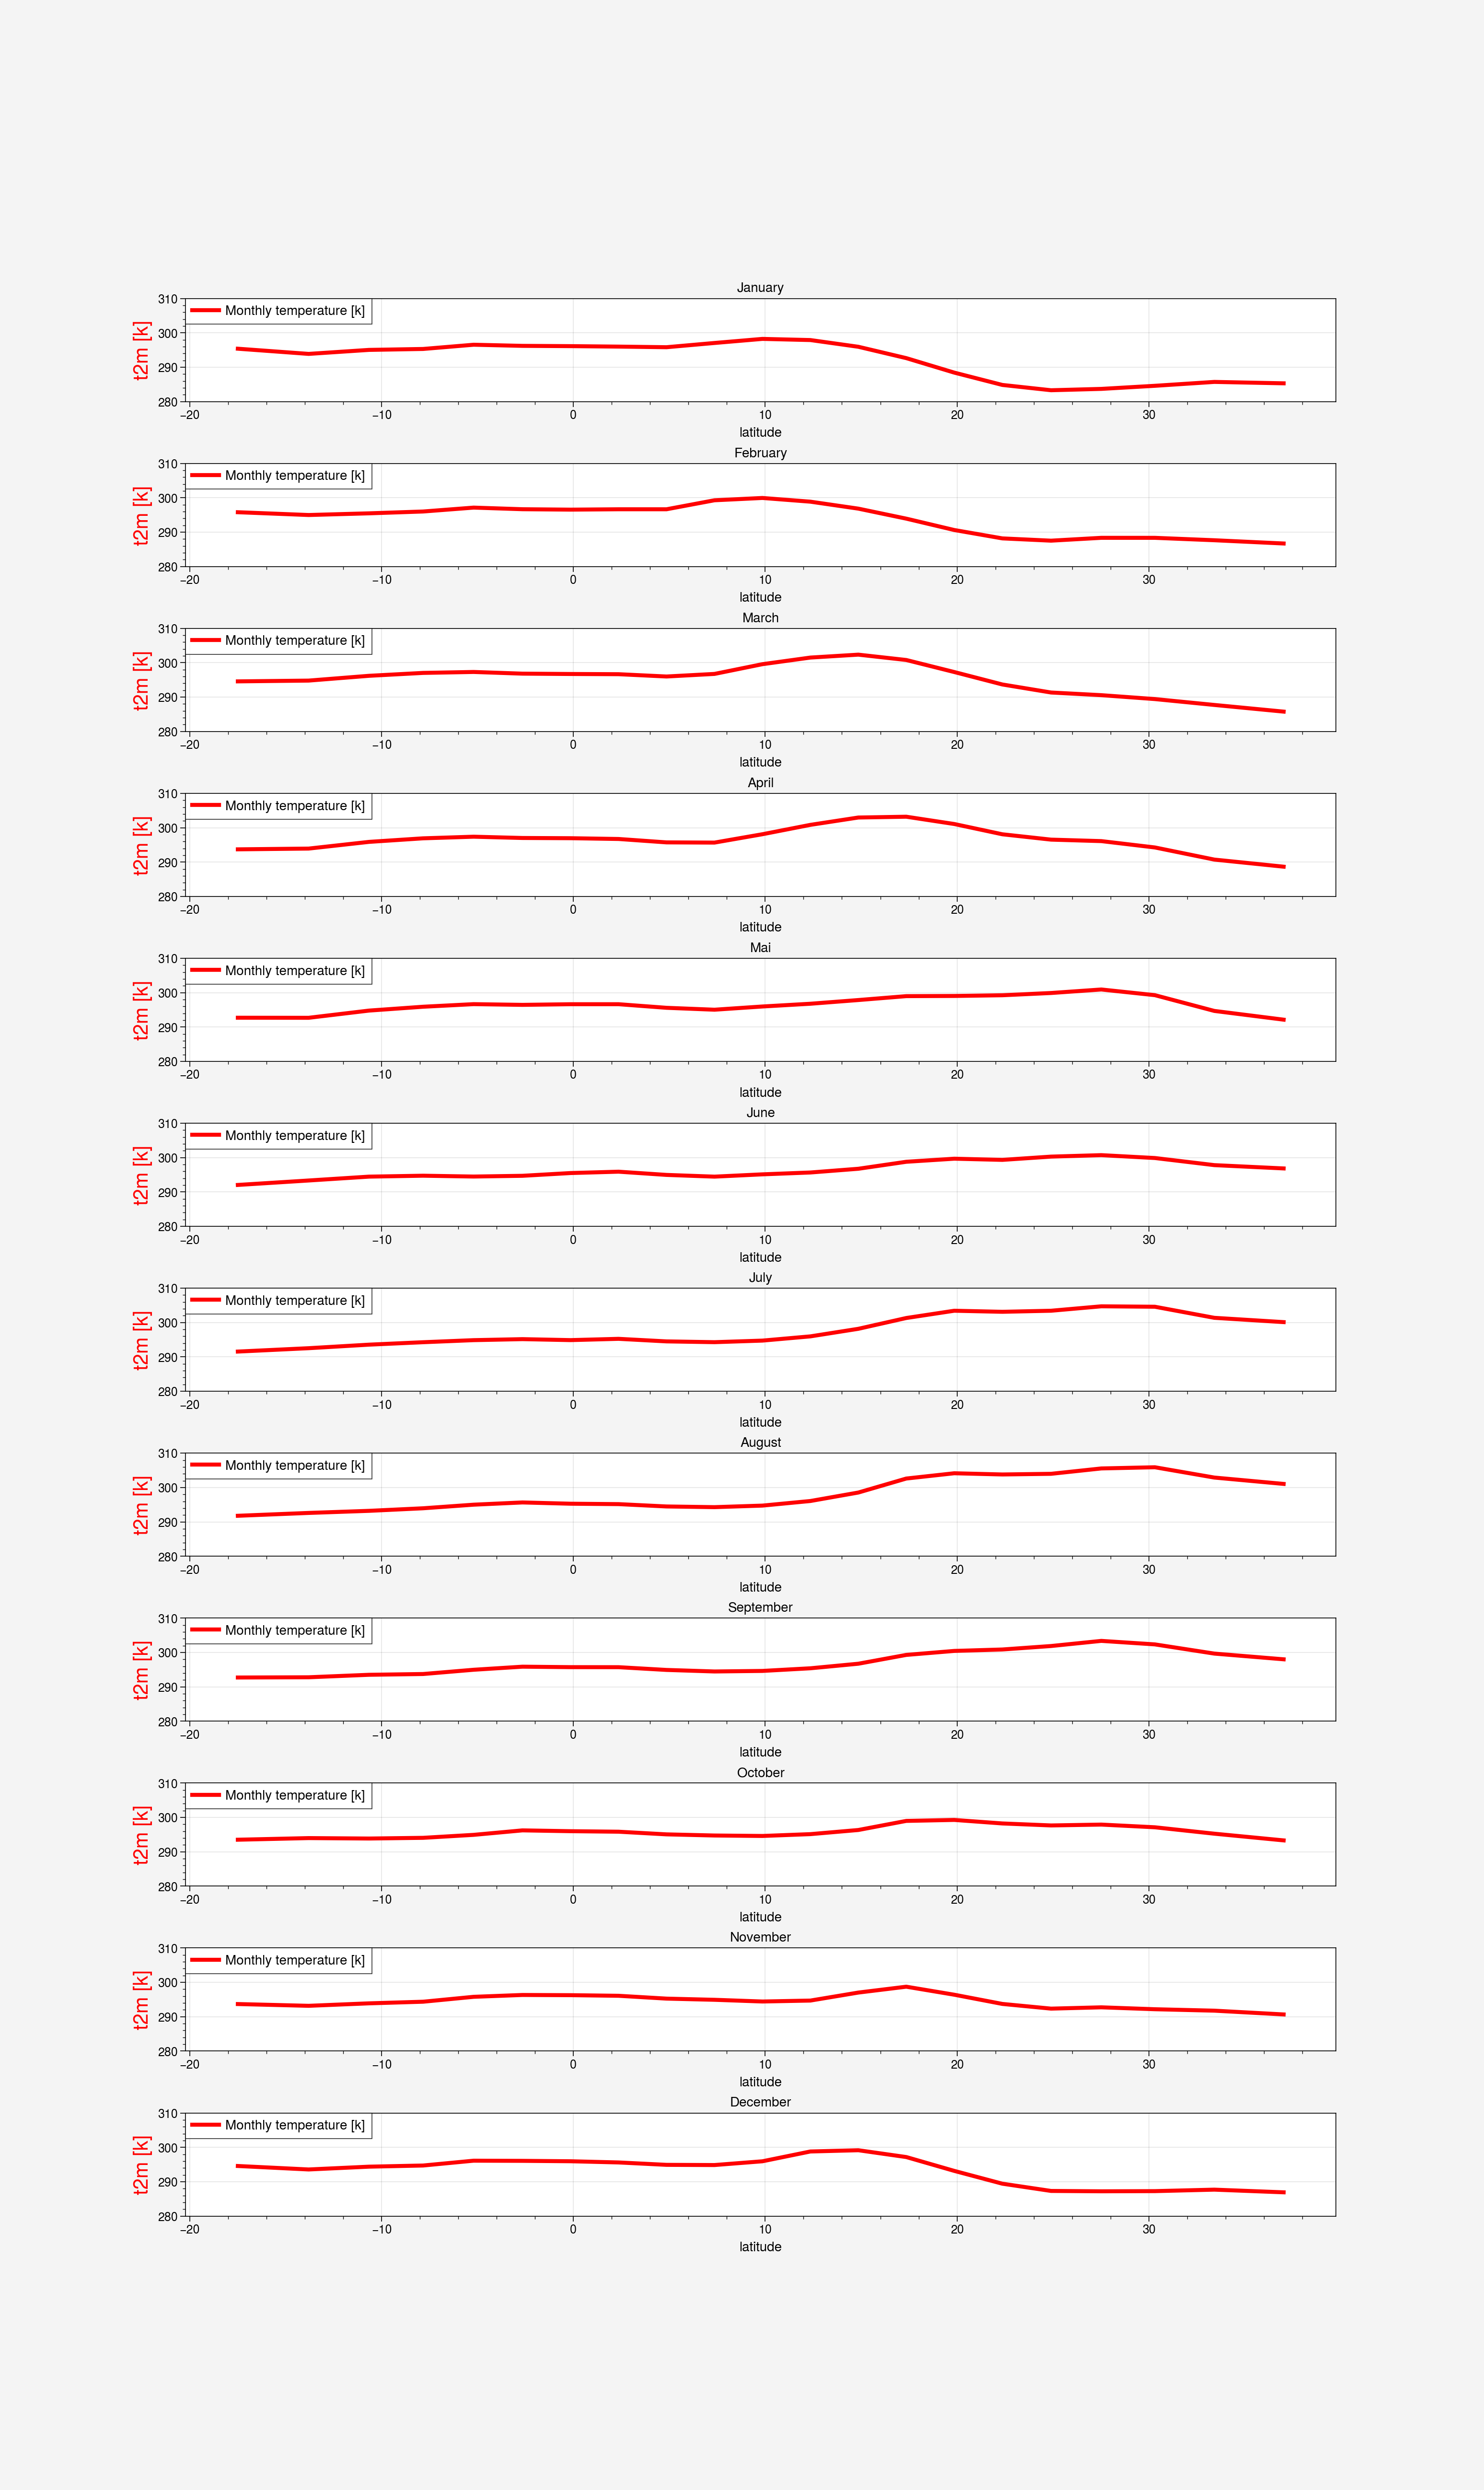

In [64]:
Noms=["January","February","March","April","Mai","June","July","August","September","October","November","December"]
fig, axs=plt.subplots(12, 1) 
# We fix the spaces between the subfigures
plt.subplots_adjust(wspace=0.5,hspace=0.6)

# We fix the size of figure
set_size(12,20)
color = 'red'

for i in range(12):
    t2m_afr.mean(dim='lon')[i,:].plot.line(ax=axs[i], color=color, linewidth=3)
    axs[i].set_title(Noms[i],fontsize=10)
    axs[i].set_xlabel("latitude", fontsize=10) 
    axs[i].legend(labels = ["Monthly temperature [k]"],  loc='upper left', fontsize=10)
    axs[i].set_ylabel("t2m [k]", color=color, fontsize=15) 
    axs[i].set_ylim(280,310) 

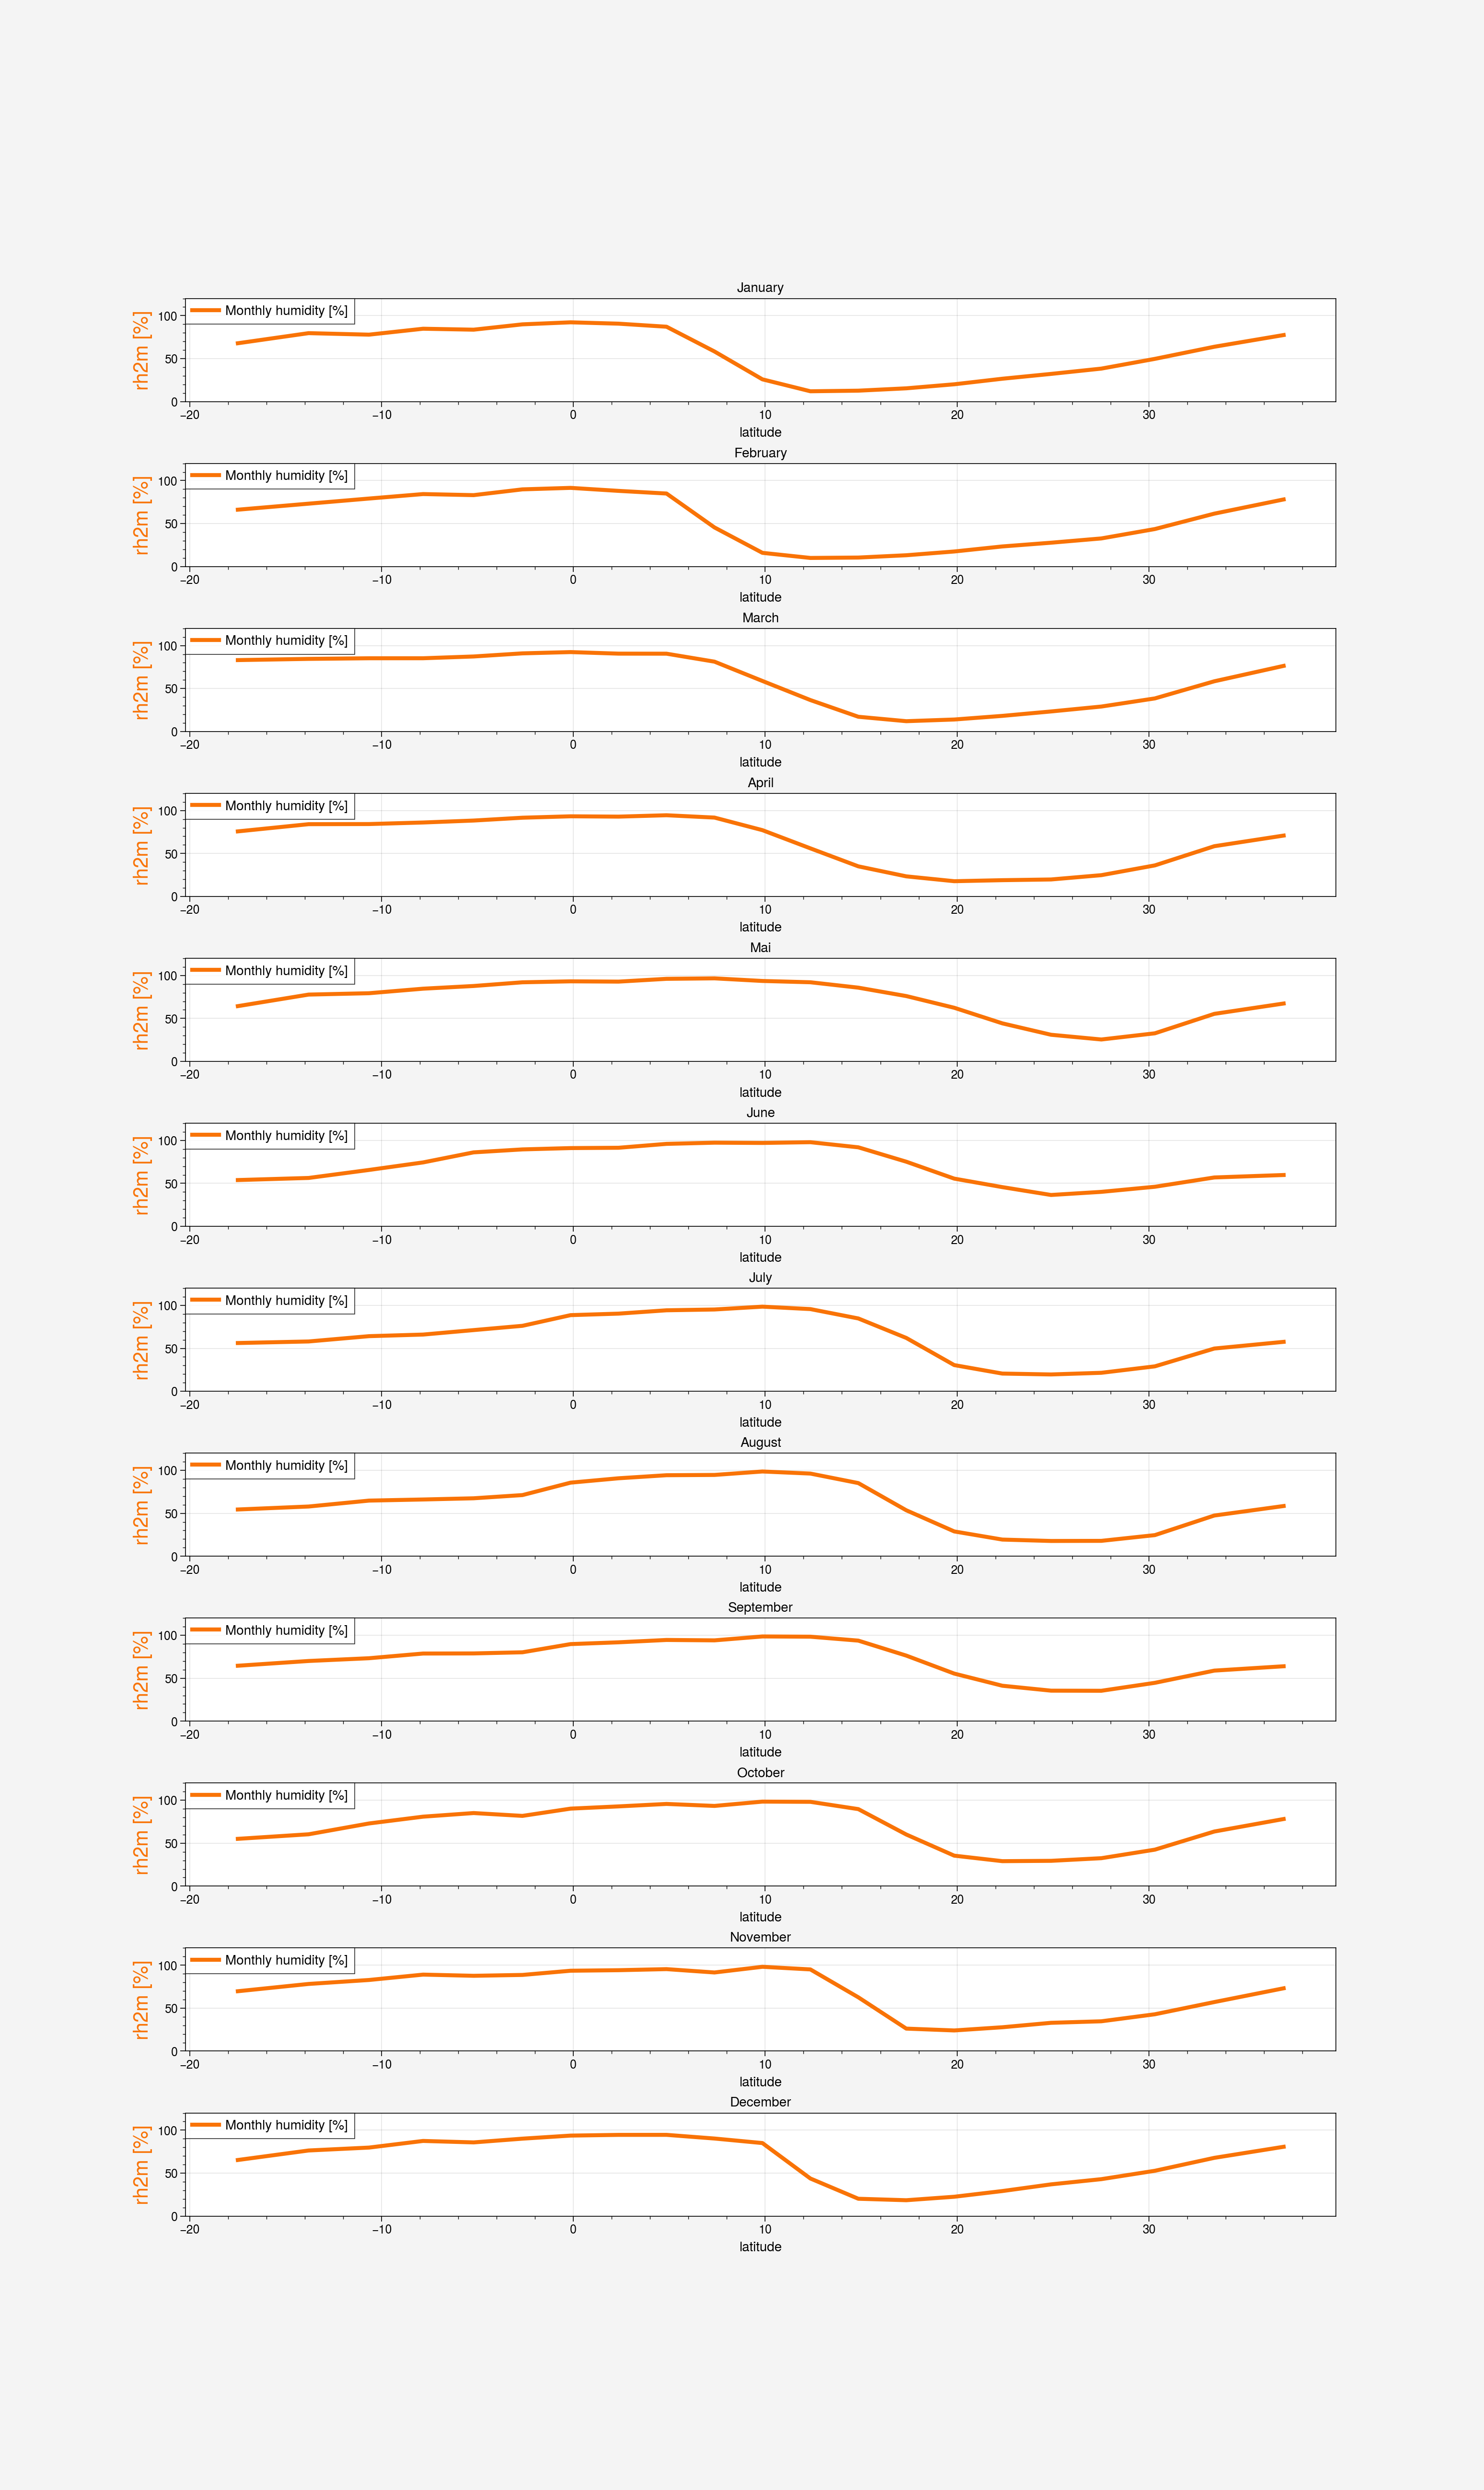

In [65]:
Noms=["January","February","March","April","Mai","June","July","August","September","October","November","December"]
fig, axs=plt.subplots(12, 1) 
# We fix the spaces between the subfigures
plt.subplots_adjust(wspace=0.5,hspace=0.6)

# We fix the size of figure
set_size(12,20)
color = 'orange'

for i in range(12):
    rh2m_afr.mean(dim='lon')[i,:].plot.line(ax=axs[i], color=color, linewidth=3)
    axs[i].set_title(Noms[i],fontsize=10)
    axs[i].set_xlabel("latitude", fontsize=10) 
    axs[i].legend(labels = ["Monthly humidity [%]"],  loc='upper left', fontsize=10)
    axs[i].set_ylabel("rh2m [%]", color=color, fontsize=15) 
    axs[i].set_ylim(0,120) 

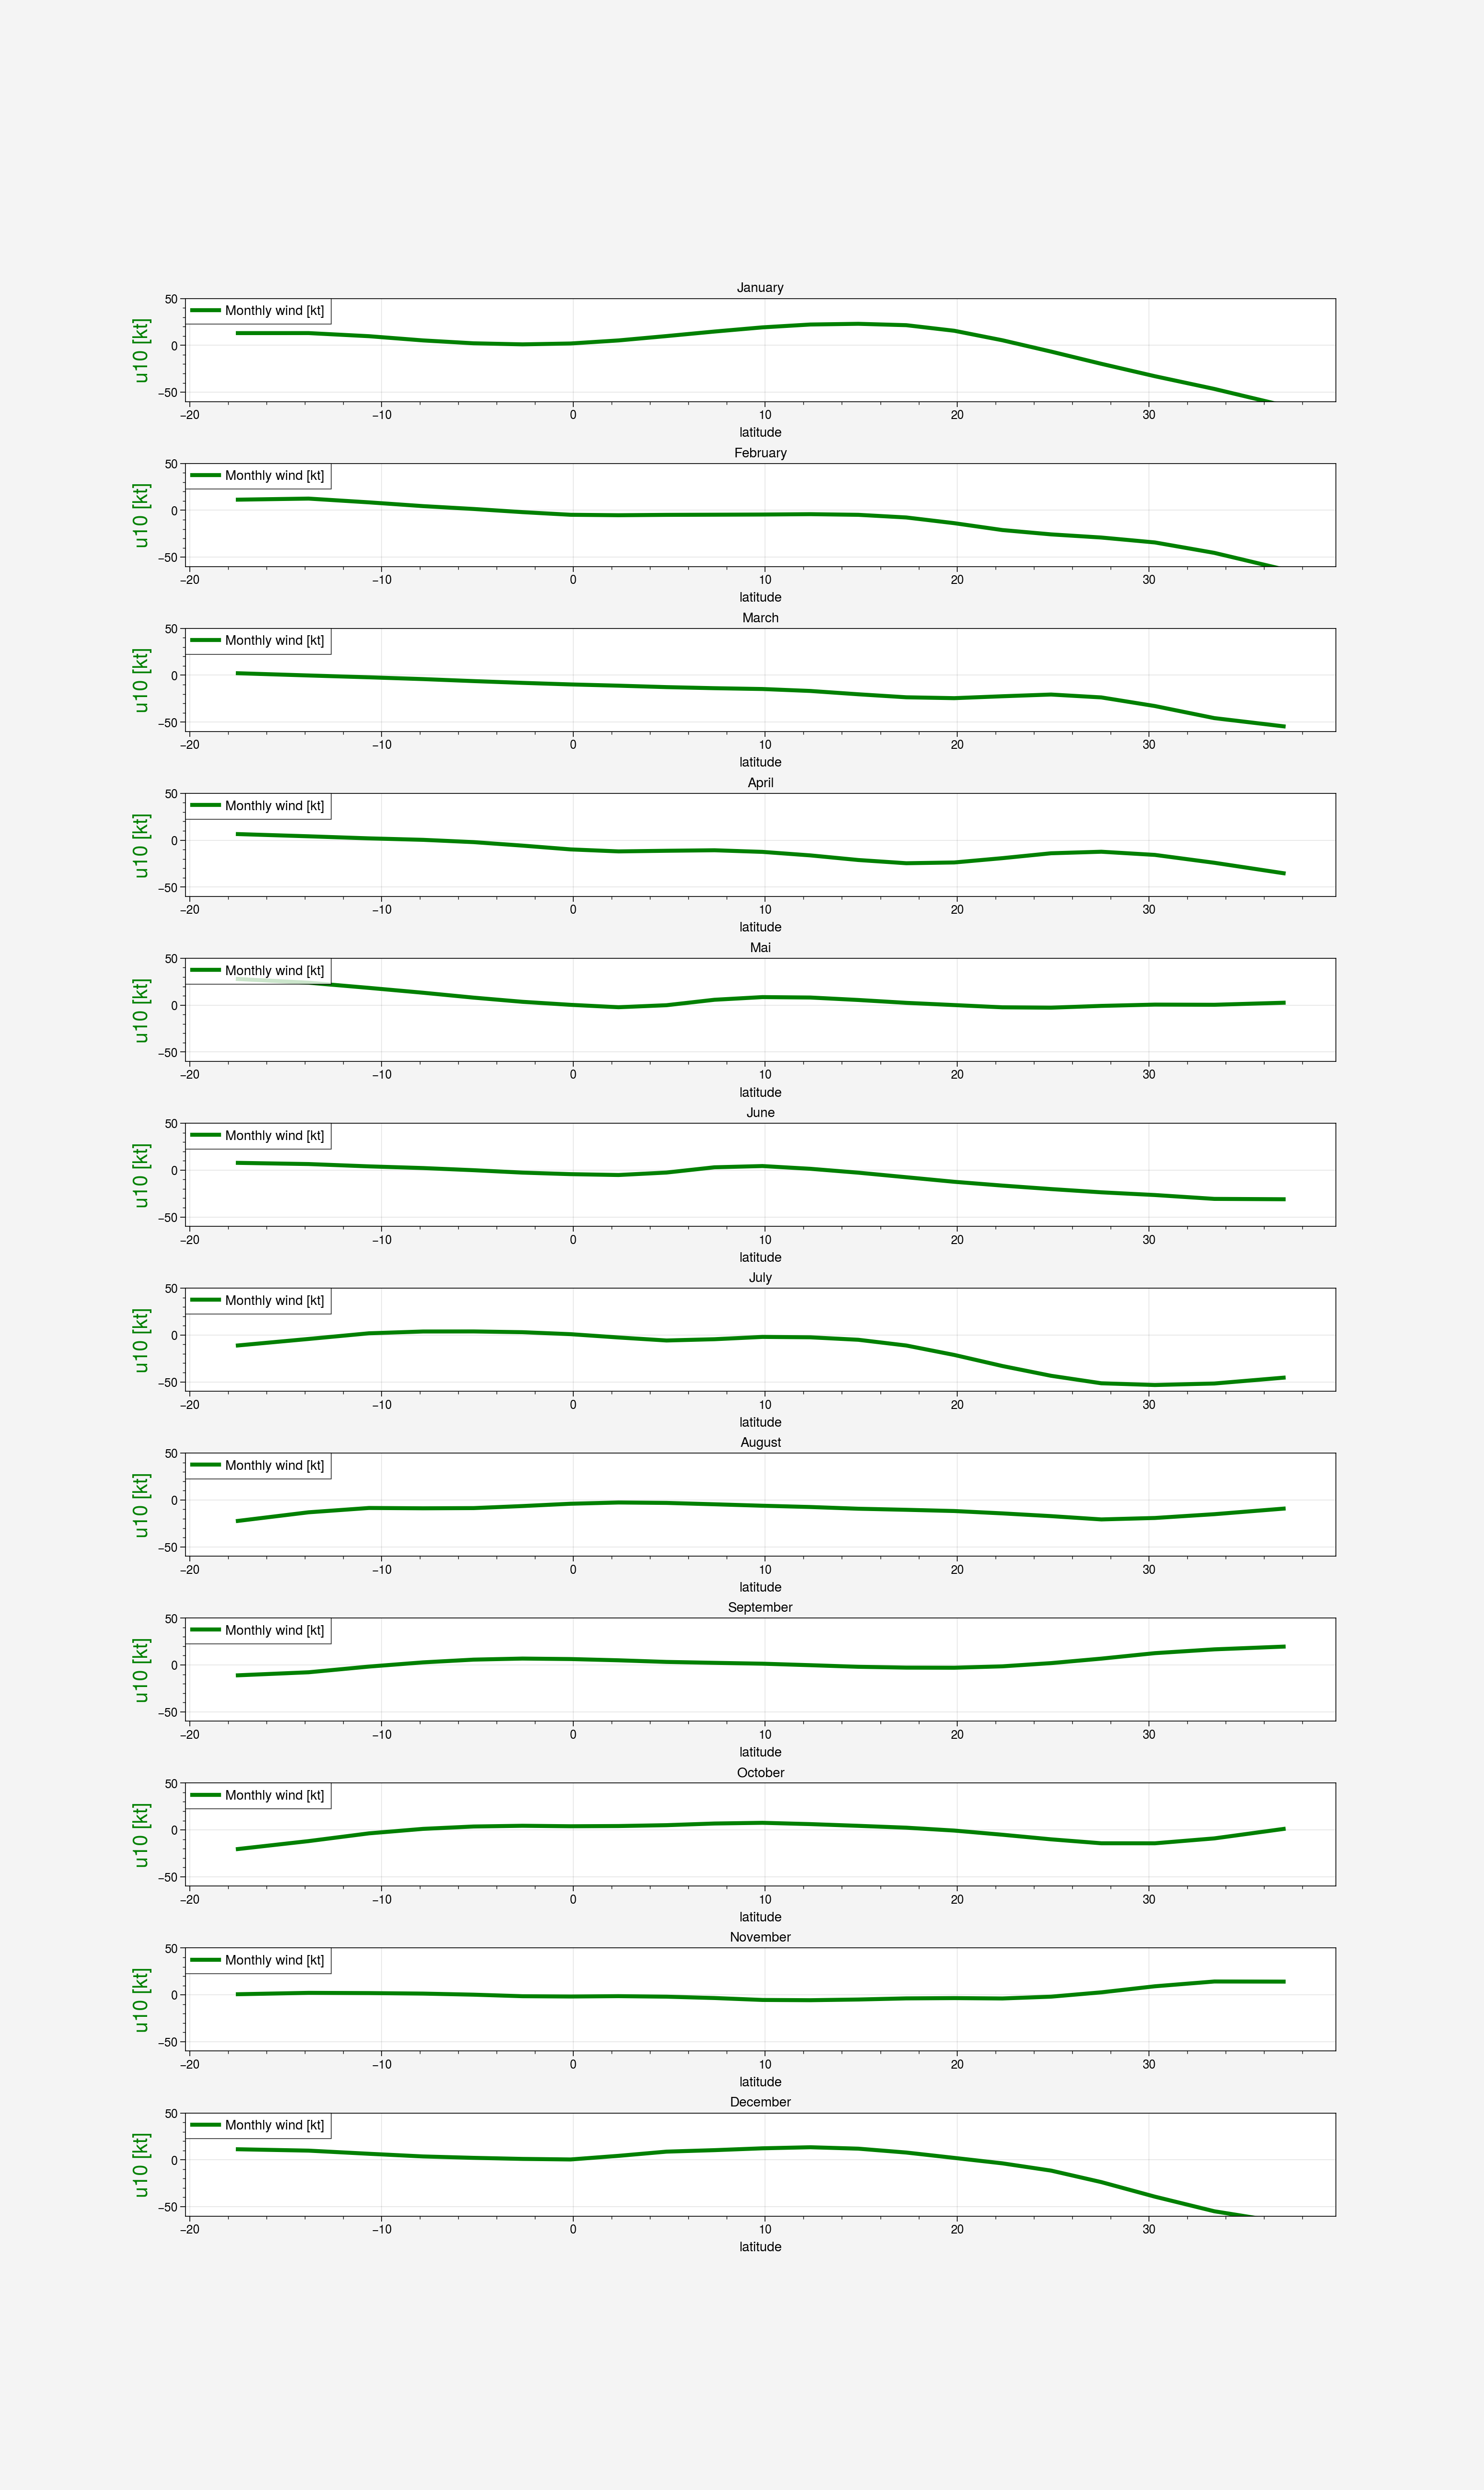

In [121]:
Noms=["January","February","March","April","Mai","June","July","August","September","October","November","December"]
fig, axs=plt.subplots(12, 1) 
# We fix the spaces between the subfigures
plt.subplots_adjust(wspace=0.5,hspace=0.6)

# We fix the size of figure
set_size(12,20)
color = 'green'

for i in range(12):
    v500.mean(dim='lon')[i,:].plot.line(ax=axs[i], color=color, linewidth=3)
    axs[i].set_title(Noms[i],fontsize=10)
    axs[i].set_xlabel("latitude", fontsize=10) 
    axs[i].legend(labels = ["Monthly wind [kt]"],  loc='upper left', fontsize=10)
    axs[i].set_ylabel("u10 [kt]", color=color, fontsize=15) 
    axs[i].set_ylim(-60,50) 

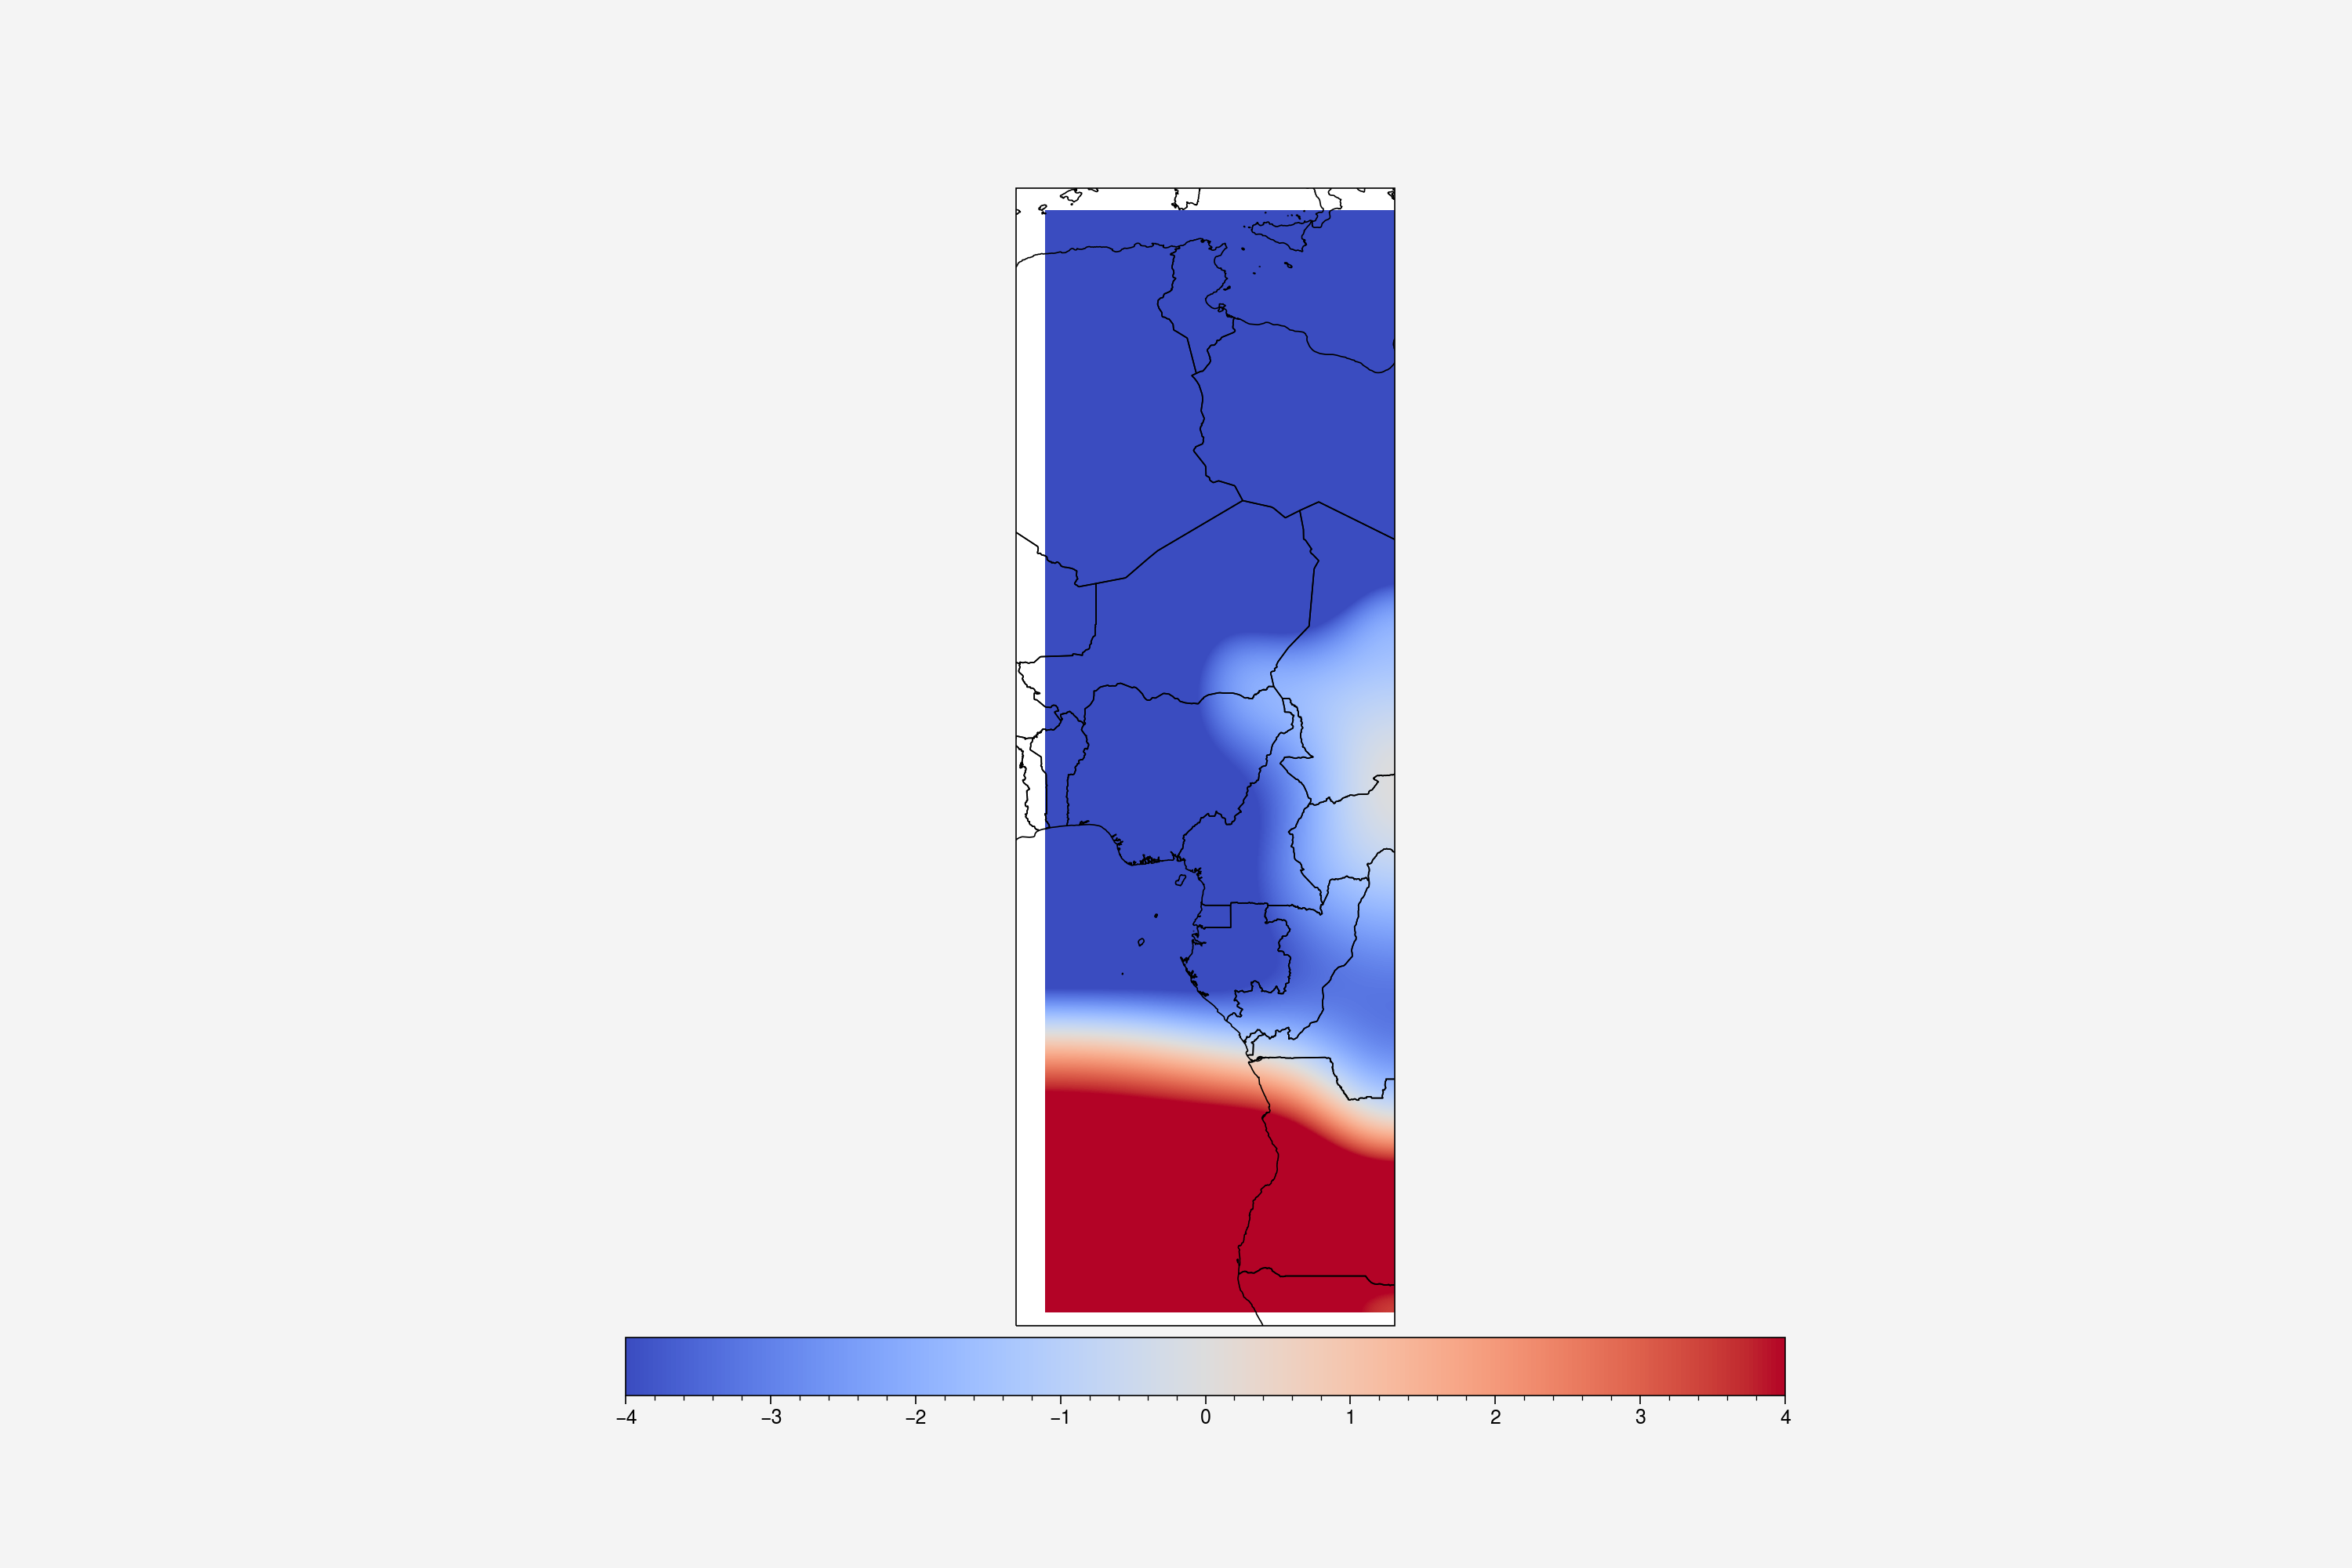

In [129]:

#Creating a static image of the european temperature anomaly for a given year.
cbar_kwargs = {
    'orientation':'horizontal',
    'fraction': 0.048,
    'pad': 0.01,
    'extend':'neither'
}

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1, projection = ccrs.PlateCarree())

ax.add_feature(NaturalEarthFeature('cultural', 'admin_0_countries', '10m'),
                       facecolor='none', edgecolor='black')
ax.set_extent([0,20, -20, 40])

i=-1

xr.plot.imshow(v500[1,:,:], ax=ax, add_labels=False,
                   vmin=-4, vmax=4, cmap='coolwarm', 
                   cbar_kwargs=cbar_kwargs, interpolation='bicubic')
plt.savefig("european_map.png", bbox_inches='tight', dpi=150)
plt.show()